In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import mplhep
from matplotlib.colors import LogNorm
#plt.style.use(mplhep.style.CMS)

In [2]:
def get_data( fileNames ):
    
    df_protons_multiRP_list = []
    df_protons_singleRP_list = []
    df_ppstracks_list = []
    df_counts_list = []

    #fileNames = [
    #    'output-test.h5'
    #]

    for file_ in fileNames:
        print ( file_ )
        with h5py.File( file_, 'r' ) as f:
            print ( list(f.keys()) )

            dset_protons_multiRP = f['protons_multiRP']
            print ( dset_protons_multiRP.shape )
            print ( dset_protons_multiRP[:,:] )

            dset_protons_singleRP = f['protons_singleRP']
            print ( dset_protons_singleRP.shape )
            print ( dset_protons_singleRP[:,:] )

            dset_ppstracks = f['ppstracks']
            print ( dset_ppstracks.shape )
            print ( dset_ppstracks[:,:] )

            dset_columns_protons = f['columns_protons']
            print ( dset_columns_protons.shape )
            columns_protons = list( dset_columns_protons )
            print ( columns_protons )
            columns_protons_str = [ item.decode("utf-8") for item in columns_protons ]
            print ( columns_protons_str )

            dset_columns_ppstracks = f['columns_ppstracks']
            print ( dset_columns_ppstracks.shape )
            columns_ppstracks = list( dset_columns_ppstracks )
            print ( columns_ppstracks )
            columns_ppstracks_str = [ item.decode("utf-8") for item in columns_ppstracks ]
            print ( columns_ppstracks_str )

            dset_selections = f['selections']
            selections_ = [ item.decode("utf-8") for item in dset_selections ]
            print ( selections_ )

            dset_counts = f['event_counts']
            df_counts_list.append( pd.Series( dset_counts, index=selections_ ) )
            print ( df_counts_list[-1] )

            chunk_size = 1000000
            entries_protons_multiRP = dset_protons_multiRP.shape[0]
            start_ = list( range( 0, entries_protons_multiRP, chunk_size ) )
            stop_ = start_[1:]
            stop_.append( entries_protons_multiRP )
            print ( start_ )
            print ( stop_ )
            for idx in range( len( start_ ) ):
                print ( start_[idx], stop_[idx] )
                #print ( dset[ start_[idx] : stop_[idx] ] )
                df_ = pd.DataFrame( dset_protons_multiRP[ start_[idx] : stop_[idx] ], columns=columns_protons_str ).astype(
                                        { "run": "int64", "lumiblock": "int64", "event": "int64", "slice": "int32", "ismultirp": "int32", "rpid": "int32", "arm": "int32",
                                          "muon0_charge": "int32",
                                          "num_bjets_ak8": "int32", "num_bjets_ak4": "int32", "num_jets_ak4": "int32",
                                          "pfcand_nextracks": "int32", "pfcand_nextracks_noDRl": "int32" } )
                df_protons_multiRP_list.append( df_ )
                print ( df_protons_multiRP_list[-1].head() )
                print ( "Data set size: {}".format( len( df_protons_multiRP_list[-1] ) ) )

            entries_protons_singleRP = dset_protons_singleRP.shape[0]
            start_ = list( range( 0, entries_protons_singleRP, chunk_size ) )
            stop_ = start_[1:]
            stop_.append( entries_protons_singleRP )
            print ( start_ )
            print ( stop_ )
            for idx in range( len( start_ ) ):
                print ( start_[idx], stop_[idx] )
                #print ( dset[ start_[idx] : stop_[idx] ] )
                df_ = pd.DataFrame( dset_protons_singleRP[ start_[idx] : stop_[idx] ], columns=columns_protons_str ).astype(
                                        { "run": "int64", "lumiblock": "int64", "event": "int64", "slice": "int32", "ismultirp": "int32", "rpid": "int32", "arm": "int32",
                                          "muon0_charge": "int32",
                                          "num_bjets_ak8": "int32", "num_bjets_ak4": "int32", "num_jets_ak4": "int32",
                                          "pfcand_nextracks": "int32", "pfcand_nextracks_noDRl": "int32" } )
                df_protons_singleRP_list.append( df_ )
                print ( df_protons_singleRP_list[-1].head() )
                print ( "Data set size: {}".format( len( df_protons_singleRP_list[-1] ) ) )

            entries_ppstracks = dset_ppstracks.shape[0]
            start_ = list( range( 0, entries_ppstracks, chunk_size ) )
            stop_ = start_[1:]
            stop_.append( entries_ppstracks )
            print ( start_ )
            print ( stop_ )
            for idx in range( len( start_ ) ):
                print ( start_[idx], stop_[idx] )
                #print ( dset[ start_[idx] : stop_[idx] ] )
                df_ = pd.DataFrame( dset_ppstracks[ start_[idx] : stop_[idx] ], columns=columns_ppstracks_str ).astype( { "run": "int64", "lumiblock": "int64", "event": "int64", "slice": "int32", "rpid": "int32" } )
                df_ppstracks_list.append( df_ )
                print ( df_ppstracks_list[-1].head() )
                print ( "Data set size: {}".format( len( df_ppstracks_list[-1] ) ) )

    df_counts = df_counts_list[0]
    for idx in range( 1, len( df_counts_list ) ):
        df_counts = df_counts.add( df_counts_list[idx] )
    print ( df_counts )

    df_protons_multiRP = pd.concat( df_protons_multiRP_list )
    print (df_protons_multiRP)

    df_protons_singleRP = pd.concat( df_protons_singleRP_list )
    print (df_protons_singleRP)

    df_ppstracks = pd.concat( df_ppstracks_list )
    print (df_ppstracks)
    
    return (df_counts, df_protons_multiRP, df_protons_singleRP, df_ppstracks)

In [3]:
def process_data_protons_multiRP( df_protons_multiRP ):

    df_protons_multiRP_index = df_protons_multiRP.set_index( ['run', 'lumiblock', 'event', 'slice'] )

    df_protons_multiRP_events = df_protons_multiRP_index.drop( columns=[ "xi", "thx", "thy", "t", "ismultirp", "rpid", "arm" ] )
    df_protons_multiRP_events = df_protons_multiRP_events[ ~df_protons_multiRP_events.index.duplicated(keep='first') ]

    df_protons_multiRP_events[ "MX" ] = df_protons_multiRP_index.groupby( ["run","lumiblock","event"] ).apply( lambda df_: 13000. * np.sqrt( df_.iloc[0].xi * df_.iloc[1].xi ) )
    df_protons_multiRP_events[ "YX" ] = df_protons_multiRP_index.groupby( ["run","lumiblock","event"] ).apply( lambda df_: 0.5 * np.log( df_.iloc[0].xi / df_.iloc[1].xi ) )
    df_protons_multiRP_events[ "diffMWW_MX" ]  = df_protons_multiRP_events[ "recoMWW" ] - df_protons_multiRP_events[ "MX" ]
    df_protons_multiRP_events[ "ratioMWW_MX" ] = df_protons_multiRP_events[ "recoMWW" ] / df_protons_multiRP_events[ "MX" ]
    df_protons_multiRP_events[ "shiftedRatioMWW_MX" ] = df_protons_multiRP_events[ "ratioMWW_MX" ] - 1.
    df_protons_multiRP_events[ "diffYWW_YX" ]  = df_protons_multiRP_events[ "recoRapidityWW" ] - df_protons_multiRP_events[ "YX" ]
    
    return (df_protons_multiRP_index, df_protons_multiRP_events)


### Background

In [4]:
fileNames_bkg = [ "output-data-random-resample_20.h5" ]
df_counts_bkg, df_protons_multiRP_bkg, df_protons_singleRP_bkg, df_ppstracks_bkg = get_data( fileNames_bkg )

output-data-random-resample_20.h5
['columns_ppstracks', 'columns_protons', 'event_counts', 'ppstracks', 'protons_multiRP', 'protons_singleRP', 'selections']
(86520, 40)
[[ 2.9730800e+05  1.0000000e+01  7.8917460e+06 ... -3.0667412e+00
   2.3442719e+02  2.9061861e+00]
 [ 2.9730800e+05  1.0000000e+01  7.8917460e+06 ... -3.0667412e+00
   2.3442719e+02  2.9061861e+00]
 [ 2.9741100e+05  4.0000000e+02  6.4530637e+08 ... -3.0606401e+00
   1.8678940e+02  1.6651486e+00]
 ...
 [ 3.0645600e+05  6.0000000e+02  1.0236027e+09 ... -1.9263034e+00
   6.7081100e+01 -2.2978168e+00]
 [ 3.0609200e+05  3.3200000e+02  6.2494829e+08 ... -3.0874684e+00
   4.8010944e+02 -8.7152565e-01]
 [ 3.0609200e+05  3.3200000e+02  6.2494829e+08 ... -3.0874684e+00
   4.8010944e+02 -8.7152565e-01]]
(173040, 40)
[[ 2.9730800e+05  1.0000000e+01  7.8917460e+06 ... -3.0667412e+00
   2.3442719e+02  2.9061861e+00]
 [ 2.9730800e+05  1.0000000e+01  7.8917460e+06 ... -3.0667412e+00
   2.3442719e+02  2.9061861e+00]
 [ 2.9730800e+05  1.

In [5]:
df_counts_bkg

All          1570080
Jet          1570080
Muon         1560700
ProtonRnd      43260
dtype: int64

In [6]:
df_protons_multiRP_bkg_index, df_protons_multiRP_bkg_events = process_data_protons_multiRP( df_protons_multiRP_bkg )

In [7]:
df_protons_multiRP_bkg_index

xi       thx       thy         t  \
run    lumiblock event      slice                                           
297308 10        7891746    0      0.143645 -0.000075  0.000023 -0.243084   
                            0      0.133400  0.000064 -0.000051 -0.260952   
297411 400       645306368  0      0.063416 -0.000021 -0.000080 -0.274064   
                            0      0.061334  0.000043 -0.000010 -0.080289   
       205       316223040  0      0.075134  0.000028 -0.000043 -0.108536   
                            0      0.072388  0.000066  0.000007 -0.178267   
297101 284       388334176  0      0.087399 -0.000015 -0.000081 -0.272319   
                            0      0.097496  0.000087 -0.000020 -0.314109   
297296 346       495167232  0      0.030873 -0.000006 -0.000197 -1.586064   
                            0      0.097676 -0.000006 -0.000080 -0.255275   
297101 301       410417536  0      0.134261 -0.000012 -0.000011 -0.028370   
                            0      0.071990 -0.000018  0.000025 -0.042276   
297219 502       963172096  0      0.075134  0.000028 -0.000043 -0.108536   
                            0      0.072388  0.000066  0.000007 -0.178267   
       500       960307904  0      0.097385 -0.000009 -0.000044 -0.085006   
                            0      0.139310 -0.000009 -0.000033 -0.063264   
299184 187       292056832  0      0.081896 -0.000007  0.000022 -0.027413   
                            0      0.078645 -0.000058 -0.000037 -0.187449   
297219 51        102732320  0      0.034104 -0.000001  0.000198 -1.605201   
                            0      0.067291  0.000010  0.000010 -0.011619   
       89        183272128  0      0.106548  0.000015  0.000025 -0.043619   
                            0      0.091995  0.000029 -0.000025 -0.064022   
297101 862       1071033536 0      0.104587  0.000005  0.000031 -0.047802   
                            0      0.155466 -0.000105  0.000026 -0.446590   
       943       1175257088 0      0.034104 -0.000001  0.000198 -1.605201   
                            0      0.067291  0.000010  0.000010 -0.011619   
297178 414       544761536  0      0.110534  0.000043  0.000100 -0.455374   
                            0      0.135508  0.000050  0.000004 -0.111073   
       413       544231168  0      0.103819  0.000017 -0.000009 -0.024203   
                            0      0.086811  0.000078 -0.000029 -0.276415   
...                                     ...       ...       ...       ...   
306049 49        91037056   19     0.086427 -0.000064 -0.000095 -0.516674   
                            19     0.047465 -0.000017 -0.000050 -0.115716   
306092 456       853135040  19     0.114640 -0.000011  0.000007 -0.019114   
                            19     0.042482 -0.000029  0.000050 -0.138940   
306423 147       245484192  19     0.074686  0.000054  0.000073 -0.327810   
                            19     0.143747 -0.000007 -0.000057 -0.138769   
       181       312461888  19     0.095863  0.000057 -0.000006 -0.133414   
                            19     0.134312  0.000028 -0.000011 -0.051299   
306091 500       593871680  19     0.133470 -0.000028  0.000104 -0.445390   
                            19     0.119711 -0.000060 -0.000022 -0.164795   
       568       716336000  19     0.118398  0.000063  0.000229 -2.113711   
                            19     0.144059 -0.000054  0.000056 -0.240525   
       580       740600576  19     0.088702 -0.000041 -0.000078 -0.307799   
                            19     0.173889 -0.000023 -0.000042 -0.113305   
306456 139       246851568  19     0.086411 -0.000035  0.000066 -0.219954   
                            19     0.149849 -0.000017  0.000029 -0.064846   
306155 1297      1583908736 19     0.062644 -0.000139 -0.000108 -1.234696   
                            19     0.138484  0.000099 -0.000009 -0.379939   
306125 449       780628160  19     0.078093  0.000016 -0.000087 -0.312482   
                            19     0.

In [8]:
df_protons_multiRP_bkg_events

jet0_pt  jet0_eta  jet0_phi  \
run    lumiblock event      slice                                   
297308 10        7891746    0      318.741333  0.349360 -0.310258   
297411 400       645306368  0      201.370987 -1.063442 -1.557397   
       205       316223040  0      218.068756  0.504739 -3.034295   
297101 284       388334176  0      428.010925  0.405552  2.060734   
297296 346       495167232  0      324.904175  1.136040  1.087477   
297101 301       410417536  0      203.403687  0.482032 -1.501181   
297219 502       963172096  0      202.516327 -1.381726 -0.589650   
       500       960307904  0      328.105713 -1.545560 -1.129152   
299184 187       292056832  0      717.471985  1.979294  2.965319   
297219 51        102732320  0      214.414474  1.305552 -2.082559   
       89        183272128  0      208.937088  1.090061 -1.481600   
297101 862       1071033536 0      206.248505 -1.086584  0.800201   
       943       1175257088 0      299.995026 -0.873054 -1.506151   
297178 414       544761536  0      320.138977 -0.572544 -1.417845   
       413       544231168  0      304.366943  1.869375 -3.110446   
299061 170       207768320  0      322.062256  1.792136 -1.540075   
       144       166707072  0      204.925964 -0.313909  1.383825   
       282       402126496  0      275.588776 -0.552247  0.151158   
297219 123       254092000  0      468.995148 -0.571427  1.291001   
297227 136       101353976  0      211.756546 -0.638199 -2.940042   
297175 28        48180748   0      225.515411 -0.046147 -2.565044   
297178 220       301635808  0      201.534149  1.237204 -2.594380   
297176 50        65889036   0      288.162994  1.600148  0.900605   
297178 12        17076184   0      438.280151  1.741365 -0.576301   
297176 177       271373568  0      201.973206  1.120074  0.731691   
297177 40        59395512   0      368.663086 -1.543435 -0.093103   
297411 585       966908480  0      213.131317 -0.960265 -2.986115   
297177 99        149759968  0      210.446686  0.532447 -1.045133   
299067 336       418529792  0      282.113037  1.434589  2.010306   
299185 90        140562880  0      412.576965 -1.663502  3.092060   
...                                       ...       ...       ...   
306139 348       306813568  19     287.633057 -0.984425  0.375568   
305046 106       119855120  19     244.008636  0.153779 -2.090275   
       110       123886808  19     212.529556 -0.083015  2.019211   
306454 59        97178000   19     213.945557 -0.169907 -0.751689   
                 96231232   19     503.824524  0.903033  2.147092   
306135 730       1284671104 19     224.051590  1.149646  1.338968   
306049 201       358820896  19     248.099197 -0.123108  1.004431   
306155 1248      1534853760 19     237.096588  0.582524 -2.331931   
306042 8         13819619   19     211.107407 -0.220323  2.349245   
306041 73        141769168  19     387.792084 -0.657658 -0.434901   
       103       200503952  19     305.885132  1.200448 -2.776551   
       192       366676352  19     211.123764 -0.043612 -1.218263   
       315       581262016  19     224.256622  1.322158 -0.885431   
306042 175       339255680  19     396.432556 -1.176900  2.903354   
306122 57        102238328  19     237.761642  1.301693  0.497688   
306049 49        91037056   19     222.322800  1.876744  2.335918   
306092 456       853135040  19     264.808197  0.187315  2.148029   
306423 147       245484192  19     232.950592  0.505450 -1.625311   
       181       312461888  19     223.278885 -0.698729  1.150171   
306091 500       593871680  19     330.575073 -0.344183 -3.040761   
       568       716336000  19     219.987320 -0.326281  2.111033   
       580       740600576  19     302.300507 -0.475754 -0.382979   
306456 139       246851568  19     267.513763 -0.703396  2.770535   
306155 1297      1583908736 19     240.013351  0.243799 -1.313466   
306125 449       780628160  19     221.890701  1.254754 -3.077239   
305589 118       227300544  19     2

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa55f130a10>],
      dtype=object)

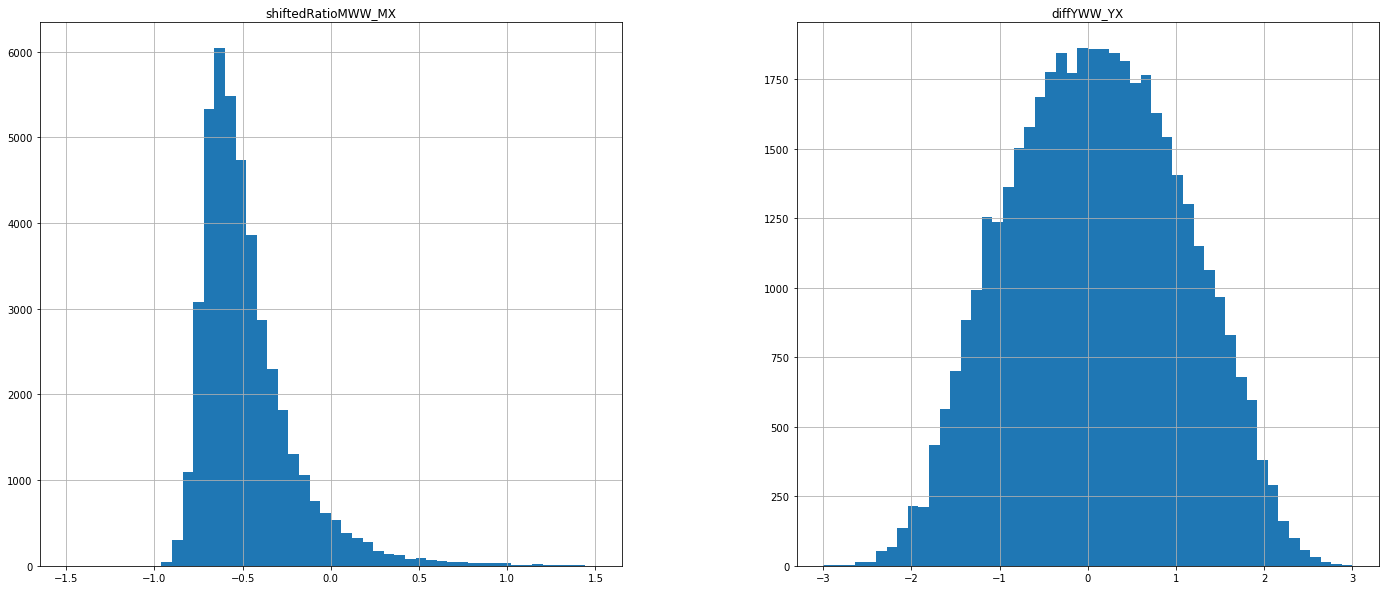

In [9]:
fig, axes = plt.subplots( 1, 2, figsize=(24,10) )
df_protons_multiRP_bkg_events.hist( "shiftedRatioMWW_MX", bins=50, range=(-1.5,1.5), ax=axes[0] )
df_protons_multiRP_bkg_events.hist( "diffYWW_YX", bins=50, range=(-3.,3.), ax=axes[1] )

In [10]:
msk_bkg  = ( np.abs( df_protons_multiRP_bkg_events[ "shiftedRatioMWW_MX" ] ) >= 0.30 )
msk_bkg &= ( np.abs( df_protons_multiRP_bkg_events[ "diffYWW_YX" ] ) >= 0.50 )
msk_bkg

run     lumiblock  event       slice
297308  10         7891746     0         True
297411  400        645306368   0         True
        205        316223040   0        False
297101  284        388334176   0        False
297296  346        495167232   0        False
297101  301        410417536   0         True
297219  502        963172096   0         True
        500        960307904   0         True
299184  187        292056832   0         True
297219  51         102732320   0        False
        89         183272128   0         True
297101  862        1071033536  0         True
        943        1175257088  0        False
297178  414        544761536   0        False
        413        544231168   0         True
299061  170        207768320   0         True
        144        166707072   0         True
        282        402126496   0        False
297219  123        254092000   0        False
297227  136        101353976   0         True
297175  28         48180748    0        Fal

Number of events: 23807


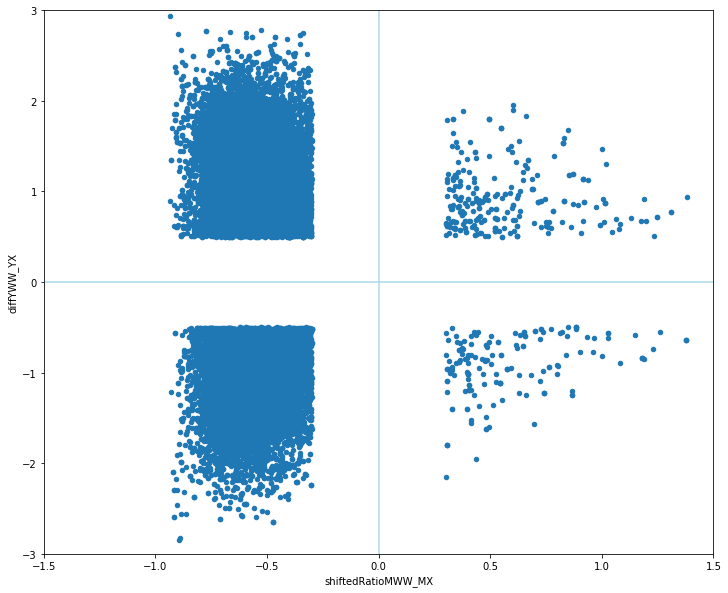

In [11]:
x_min = -1.5
x_max =  1.5
y_min = -3.0
y_max =  3.0
x_center = ( x_min + x_max ) / 2.
y_center = ( y_min + y_max ) / 2.

fig = plt.figure( figsize=(12,10) )
plt.plot( (x_min,x_max), (y_center,y_center), color='lightblue' )
plt.plot( (x_center,x_center), (y_min,y_max), color='lightblue' )
ax = plt.gca()
df_protons_multiRP_bkg_events[ msk_bkg ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax )
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

n_events_bkg = df_protons_multiRP_bkg_events[ msk_bkg ].shape[0]
print ( "Number of events: {}".format( n_events_bkg ) )

### Data

In [12]:
fileNames_data = [ "output-data.h5" ]
df_counts_data, df_protons_multiRP_data, df_protons_singleRP_data, df_ppstracks_data = get_data( fileNames_data )

output-data.h5
['columns_ppstracks', 'columns_protons', 'event_counts', 'ppstracks', 'protons_multiRP', 'protons_singleRP', 'selections']
(4326, 40)
[[ 2.9741100e+05  2.0500000e+02  3.1622304e+08 ... -3.0345914e+00
   2.0199973e+02  2.1429883e-01]
 [ 2.9741100e+05  2.0500000e+02  3.1622304e+08 ... -3.0345914e+00
   2.0199973e+02  2.1429883e-01]
 [ 2.9741100e+05  2.0500000e+02  3.1643302e+08 ... -2.8607266e+00
   2.6875125e+02 -2.5549490e+00]
 ...
 [ 3.0609200e+05  6.6600000e+02  1.2209601e+09 ... -2.9808006e+00
   2.8684525e+02  2.0633395e+00]
 [ 3.0609200e+05  3.4300000e+02  6.4736493e+08 ... -2.2075524e+00
   2.4493660e+02  7.2204214e-01]
 [ 3.0609200e+05  3.4300000e+02  6.4736493e+08 ... -2.2075524e+00
   2.4493660e+02  7.2204214e-01]]
(8652, 40)
[[ 2.9741100e+05  2.0500000e+02  3.1622304e+08 ... -3.0345914e+00
   2.0199973e+02  2.1429883e-01]
 [ 2.9741100e+05  2.0500000e+02  3.1622304e+08 ... -3.0345914e+00
   2.0199973e+02  2.1429883e-01]
 [ 2.9741100e+05  2.0500000e+02  3.1622304

In [13]:
df_protons_multiRP_data_index, df_protons_multiRP_data_events = process_data_protons_multiRP( df_protons_multiRP_data )

In [14]:
df_protons_multiRP_data_index

xi           thx           thy  \
run    lumiblock event      slice                                         
297411 205       316223040  0      0.112909 -1.138678e-05 -2.359810e-07   
                            0      0.142016 -5.927520e-05 -5.139783e-05   
                 316433024  0      0.047672  3.475338e-07 -1.551688e-04   
                            0      0.053283 -2.594476e-05  1.662401e-05   
297101 370       500976032  0      0.074480  5.845811e-05 -9.597090e-05   
                            0      0.091005 -2.822397e-05 -3.234632e-05   
       505       668369216  0      0.125338  1.634835e-05 -4.860549e-06   
                            0      0.126938  8.313224e-06 -1.064668e-06   
297219 787       1425137280 0      0.111469  4.793925e-05  3.160608e-06   
                            0      0.080245 -1.801980e-06  2.290369e-05   
297050 403       500993152  0      0.130760  1.028559e-05  1.911068e-04   
                            0      0.065475  8.072794e-05 -3.959778e-05   
297178 697       870605696  0      0.049976 -8.912014e-05 -9.530537e-05   
                            0      0.135665 -1.776611e-05 -5.981235e-05   
297101 862       1071033536 0      0.093559  3.419771e-05  2.691704e-05   
                            0      0.074372  9.880331e-05  2.958092e-05   
       911       1123641728 0      0.049856 -1.893342e-05 -2.462520e-05   
                            0      0.071347 -3.894152e-06  4.081367e-05   
297178 666       840800256  0      0.116242  1.738557e-06 -1.372357e-05   
                            0      0.102898 -5.345756e-05  1.810795e-05   
       766       946702848  0      0.131125 -1.095593e-06  8.948083e-05   
                            0      0.129157 -3.779837e-06  6.084369e-05   
298996 207       220344592  0      0.134261 -1.246158e-05 -1.093036e-05   
                            0      0.071990 -1.849198e-05  2.471780e-05   
297178 266       361288608  0      0.128542  3.092448e-05  5.876295e-05   
                            0      0.098105 -5.829912e-05  2.748324e-05   
297292 250       454772416  0      0.075780 -2.951101e-05 -1.372629e-04   
                            0      0.113376 -3.574970e-05 -9.167629e-05   
297219 119       246229344  0      0.081896 -7.497543e-06  2.201788e-05   
                            0      0.078645 -5.768395e-05 -3.655407e-05   
...                                     ...           ...           ...   
306092 405       760614208  0      0.095498 -4.137292e-05  2.226372e-05   
                            0      0.149806  2.997934e-06  2.208685e-05   
305046 93        106393128  0      0.050357 -6.092811e-05 -1.721245e-04   
                            0      0.143401  1.047580e-05 -2.039529e-05   
305064 580       929028928  0      0.068198 -4.059573e-05 -7.625236e-06   
                            0      0.116528 -7.010249e-06 -3.417816e-05   
306048 26        49603400   0      0.090315  3.406277e-07  6.261190e-05   
                            0      0.193375 -1.159232e-04  8.489928e-05   
306030 38        76541464   0      0.079988  2.000039e-05 -7.230146e-05   
                            0      0.135225  8.650458e-05  6.217066e-06   
306135 1072      1931327232 0      0.132957  1.083821e-05  1.591701e-04   
                            0      0.073327 -6.942642e-05  6.009623e-05   
305046 115       130269968  0      0.063273  2.913345e-05  9.772697e-05   
                            0      0.090076  1.577819e-05  9.869810e-06   
306125 2403      3555737088 0      0.036247 -1.896777e-05 -1.858289e-04   
                            0      0.079319  1.274114e-05 -7.590629e-05   
306139 24        20476824   0      0.076159  4.144529e-05 -9.082774e-06   
                            0      0.153744 -1.146563e-05  2.868243e-05   
305252 162       200564864  0      0.094314  2.925674e-05  4.006570e-05   
                            0      0.046108  7.488381e-05  7.768979e-05   
306092 361       680397120  0      0.097000  4.299239e-05  7.02608

In [15]:
df_protons_multiRP_data_events

jet0_pt  jet0_eta  jet0_phi  \
run    lumiblock event      slice                                   
297411 205       316223040  0      218.068756  0.504739 -3.034295   
                 316433024  0      384.878784  2.095394  0.305777   
297101 370       500976032  0      331.734375 -0.850632  3.026100   
       505       668369216  0      206.841949 -2.248741 -1.192259   
297219 787       1425137280 0      209.280380  0.742523 -0.572275   
297050 403       500993152  0      228.137985 -0.510389  1.531566   
297178 697       870605696  0      224.234421  0.378060  0.127324   
297101 862       1071033536 0      206.248505 -1.086584  0.800201   
       911       1123641728 0      202.618423  1.455921 -3.055065   
297178 666       840800256  0      290.368500  0.004252 -1.859135   
       766       946702848  0      394.410339  1.042095 -2.047442   
298996 207       220344592  0      262.325012 -0.616909  1.228962   
297178 266       361288608  0      217.565414  0.739285 -0.035372   
297292 250       454772416  0      492.415619 -0.338664 -0.540008   
297219 119       246229344  0      273.319489  0.158944 -0.556130   
       123       254529536  0      415.990601  0.616110 -1.851164   
       212       432124288  0      262.587921 -0.914217 -1.383680   
297411 660       1099737600 0      291.814758 -2.147290 -0.635057   
297468 18        32808696   0      221.691528 -0.341072 -0.264875   
297292 150       279785600  0      444.686096 -0.009085  2.801576   
297296 333       477981696  0      511.862488 -0.350204  1.188340   
       409       579237184  0      233.925217  0.807464 -2.974219   
297178 7         9059698    0      260.169647  0.431214  3.046186   
       210       289156544  0      357.233063 -0.782804 -0.161058   
297411 467       754382080  0      312.454773  2.267957  2.610680   
       393       634553280  0      279.480164 -1.466843  0.352303   
297219 1486      2365754112 0      479.421509 -1.596118  2.546377   
297178 384       508421952  0      205.232498  2.275943  1.999862   
       224       307389504  0      231.635773 -0.105095 -2.165563   
       290       390949280  0      218.450882  1.611314 -2.366560   
...                                       ...       ...       ...   
305862 499       820050816  0      263.325714 -0.345153  2.471636   
       665       1097028224 0      215.062485  0.144782  1.940251   
305898 164       206041168  0      837.416260 -1.160865 -0.836556   
       181       237568352  0      226.264969  1.464836  0.720976   
       449       722691840  0      237.849411  0.517717 -1.899104   
       379       599388352  0      319.228149  1.209297  0.035705   
305064 253       419057344  0      202.067276 -0.376860 -1.698992   
305898 671       1097518976 0      384.597198  0.168629 -0.494380   
       694       1137197312 0      385.425323  0.019625 -0.172111   
305902 163       215091168  0      277.135071  0.546765  0.464101   
306125 44        75651944   0      222.678589  0.266193  2.869519   
305902 123       144969120  0      286.753510 -0.398693  2.522849   
       164       216719920  0      358.376007  1.538252  2.647400   
       275       412651200  0      237.590637 -0.299985 -2.535862   
       358       557093888  0      251.497910 -1.038303 -0.182105   
306092 405       760614208  0      209.995056  0.376752  0.415594   
305046 93        106393128  0      202.458557  0.335240 -2.961261   
305064 580       929028928  0      262.628937 -0.483522 -0.955638   
306048 26        49603400   0      438.131042 -1.475195 -1.460356   
306030 38        76541464   0      226.591766 -0.178814  1.954550   
306135 1072      1931327232 0      273.112976 -0.895130  2.069661   
305046 115       130269968  0      325.537567  0.405862 -2.619751   
306125 2403      3555737088 0      391.585632  1.907020 -1.042255   
306139 24        20476824   0      262.176971  2.185755  2.396373   
305252 162       200564864  0      205.837509 -0.701591 -1.014871   
306092 361       680397120  0      2

In [16]:
msk_data  = ( np.abs( df_protons_multiRP_data_events[ "shiftedRatioMWW_MX" ] ) >= 0.30 )
msk_data &= ( np.abs( df_protons_multiRP_data_events[ "diffYWW_YX" ] ) >= 0.50 )
msk_data

run     lumiblock  event       slice
297411  205        316223040   0        False
                   316433024   0         True
297101  370        500976032   0        False
        505        668369216   0         True
297219  787        1425137280  0        False
297050  403        500993152   0         True
297178  697        870605696   0        False
297101  862        1071033536  0         True
        911        1123641728  0         True
297178  666        840800256   0        False
        766        946702848   0         True
298996  207        220344592   0        False
297178  266        361288608   0         True
297292  250        454772416   0        False
297219  119        246229344   0        False
        123        254529536   0         True
        212        432124288   0        False
297411  660        1099737600  0        False
297468  18         32808696    0        False
297292  150        279785600   0        False
297296  333        477981696   0        Fal

Number of events: 1197
Ratio: 1.005586592178771


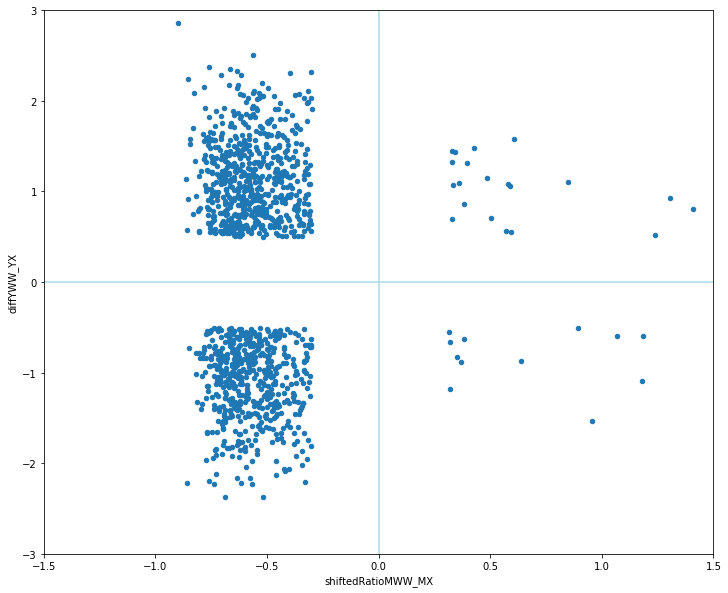

In [17]:
x_min = -1.5
x_max =  1.5
y_min = -3.0
y_max =  3.0
x_center = ( x_min + x_max ) / 2.
y_center = ( y_min + y_max ) / 2.

fig = plt.figure( figsize=(12,10) )
plt.plot( (x_min,x_max), (y_center,y_center), color='lightblue' )
plt.plot( (x_center,x_center), (y_min,y_max), color='lightblue' )
ax = plt.gca()
df_protons_multiRP_data_events[ msk_data ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax )
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

n_events_data = df_protons_multiRP_data_events[ msk_data ].shape[0]
resample_factor = 20
print ( "Number of events: {}".format( n_events_data ) )
print ( "Ratio: {}".format( n_events_data / ( n_events_bkg / resample_factor ) ) )

### References